<a href="https://colab.research.google.com/github/ismoil27/computer_vision/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import matplotlib.pyplot as plt

In [28]:
print(torch.__version__)

2.8.0+cu126


In [29]:
print("CUDA available:", torch.cuda.is_available())

CUDA available: False


In [30]:
scalar = torch.tensor(5) # 0D
print('scalar:', scalar)
print("Shape:", scalar.shape)
print('Number of Dimensions:', scalar.ndim)
print('Size:', scalar.size())

scalar: tensor(5)
Shape: torch.Size([])
Number of Dimensions: 0
Size: torch.Size([])


In [31]:
vector = torch.tensor([1, 2, 3]) # 1D
print("vector:", vector)
print('Shape:', vector.shape)
print('Number of Dimensions:', vector.ndim)
print('Size:', vector.size())

vector: tensor([1, 2, 3])
Shape: torch.Size([3])
Number of Dimensions: 1
Size: torch.Size([3])


In [32]:
MATRIX = torch.tensor([[1, 2, 3],
                      [4, 5, 6]]) # 2D
print('MATRIX:', MATRIX)
print('Shape:', MATRIX.shape)
print('Number of Dimensions:', MATRIX.ndim)

MATRIX: tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])
Number of Dimensions: 2


In [33]:
tensor3d = torch.stack([MATRIX, MATRIX + 10]) # 3D
print('tensor3d:', tensor3d)
print('Shape:', tensor3d.shape) # [2, 2, 3] | 2 matrices => channels | 2 rows in each matrix | 3 columns in each matrix (height, width) [C, H, W]
print('Number of Dimensions:', tensor3d.ndim)

tensor3d: tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[11, 12, 13],
         [14, 15, 16]]])
Shape: torch.Size([2, 2, 3])
Number of Dimensions: 3


In [34]:
random_numbers = torch.rand(2, 3) # 0 ~ 1
print('Random Numbers:', random_numbers)
print('Data type:', random_numbers.dtype)
print('Device of random_numbers:', random_numbers.device)

Random Numbers: tensor([[0.3829, 0.9593, 0.3904],
        [0.6009, 0.2566, 0.7936]])
Data type: torch.float32
Device of random_numbers: cpu


In [35]:
print('Zeros:', torch.zeros(3, 3))

Zeros: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [36]:
print('Ones:', torch.ones(2, 4))


Ones: tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [37]:
x = torch.tensor([[1, 2],
                 [3, 4]])
y = torch.tensor([[5, 6],
                  [7, 8]])

# Element-wise addition
print('Addition:', x + y)
print('=================')

# Element-wise multiplication
print('Multiplication:', x * y)
print('=================')

# Matrix multiplication (dot product)
print('Matrix @ multiplcation:', x @ y)

#x
# [[1, 2],
#  [3, 4]]

# #y
# [[5, 6],
#  [7, 8]]


Addition: tensor([[ 6,  8],
        [10, 12]])
Multiplication: tensor([[ 5, 12],
        [21, 32]])
Matrix @ multiplcation: tensor([[19, 22],
        [43, 50]])


# [1, 2] * [5, 7] = 1 * 5 + 2 * 7 = 5 + 14 = 19
# [1, 2] * [6, 8] = 1 * 6 + 2 * 8 = 6 + 16 = 22

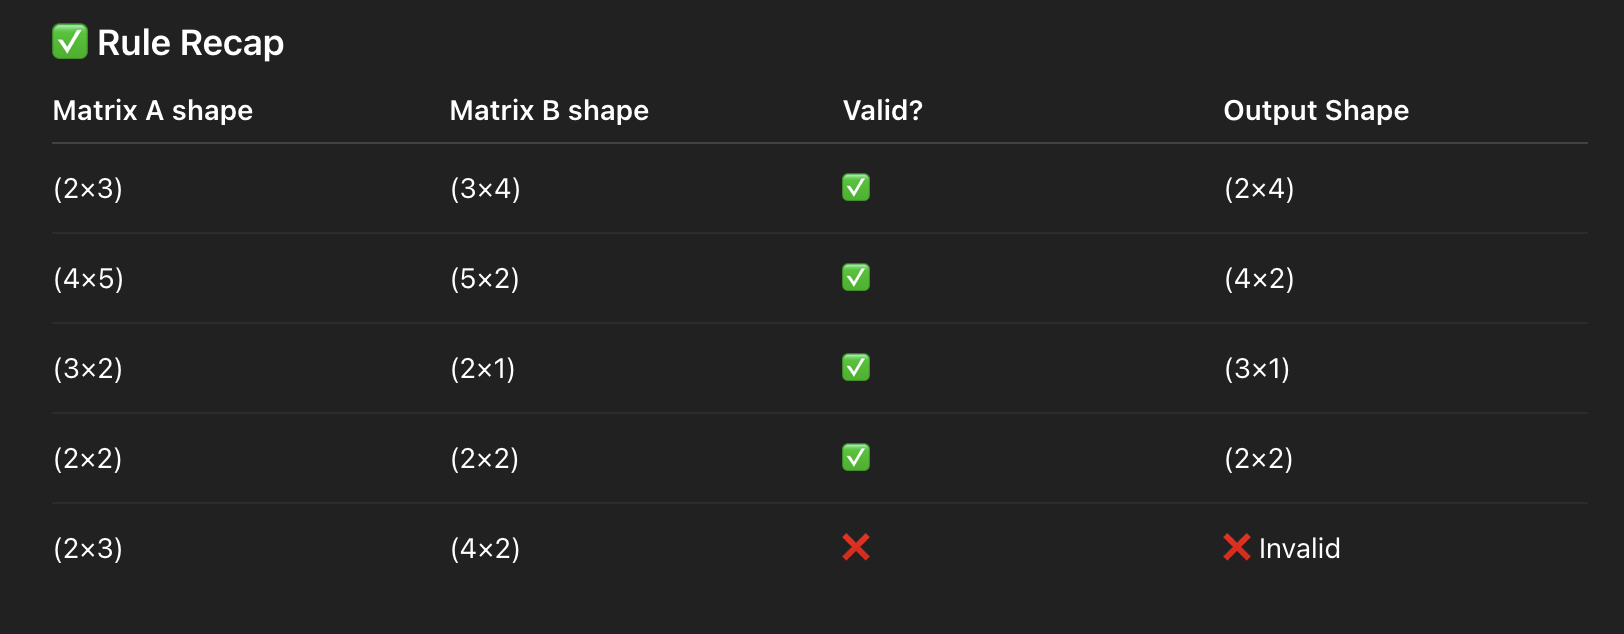

In [38]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks | nn module
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

In [39]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# CNN
# NN

Using device: cpu


In [40]:
# Create weight and bias
weight = 0.7 # weight
bias = 0.3 # bias

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias #

# Liner Regression: y = wx + b
print("X:", X)

print("\n y:", y)

# Split data
train_split = int(0.8 * len(X)) # 10000(100%) data => 8000(80%) train | 2000(20%) test
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

 y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
 

(40, 40, 10, 10)

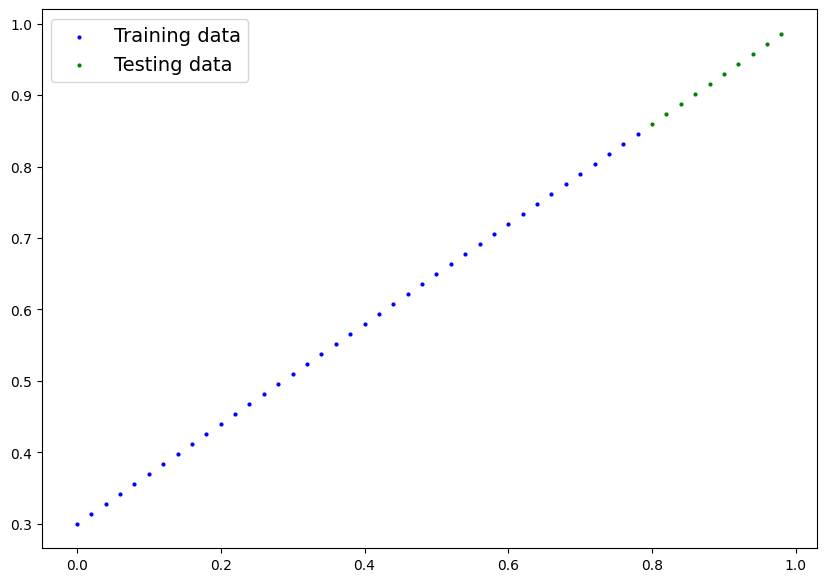

In [41]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14})

# CALL
plot_predictions()

In [42]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, #weight and
                                      out_features=1) # Linear => y = wx+b

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict(),

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [43]:
# Create loss function
loss_fn = nn.L1Loss() # Loss Function | MAE => Mean Absolute Error

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01) # weight, bias | equal

Text(0.5, 1.0, 'Predictions before training (red = random guesses)')

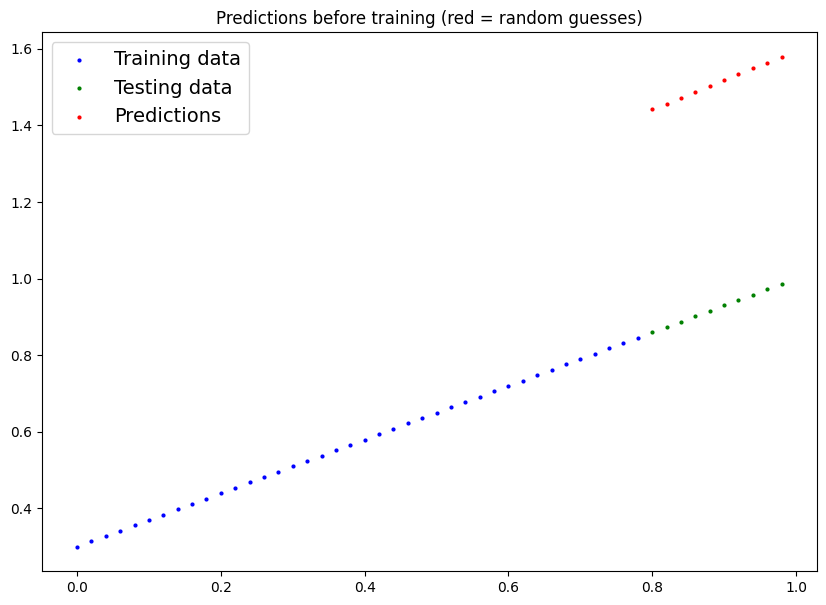

In [44]:
# See model's untrained predictions (on test set)
model_1.eval() #

with torch.inference_mode():
    y_preds_early = model_1(X_test) # backwards

plot_predictions(predictions=y_preds_early)
plt.title("Predictions before training (red = random guesses)")


In [45]:
# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradient optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step() # weight and bias

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904


In [46]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

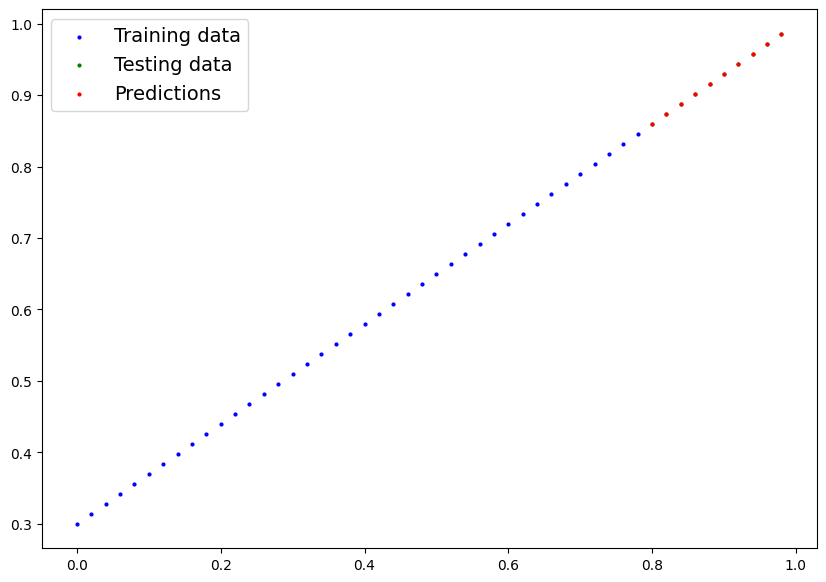

In [47]:
# Put data on the CPU and plot it
plot_predictions(predictions=y_preds)

In [48]:
torch.save(model_1.state_dict(), 'trained_model.pth')

In [49]:
loaded_model = LinearRegressionModelV2()

loaded_model.load_state_dict(torch.load('/content/trained_model.pth'))

loaded_model.eval()

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)